In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
y = pd.read_csv("simul_label_jpg_y.csv").iloc[:,1:]

y

,이름,진단명,처방전
0,이민진,Dementia,진통제 필요 시 복용
1,박현순,Ischemic Stroke,항현기증제 1일 3회
2,조서민,Ischemic Stroke,진통제 필요 시 복용
3,최복옹,Parkinson's Disease,인지기능개선제 복용
4,최철순,Amyotrophic Lateral Sclerosis,진통제 필요 시 복용
...,...,...,...
995,조민유,Epilepsy,항혈소판제 아침 식후
996,한점다,Migraine,근이완제 1일 2회
997,장서점,Migraine,레보도파 1일 3회 복용
998,박진다,Bell's Palsy,항현기증제 1일 3회


(array([957.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  43.]),
 array([7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ]),
 <BarContainer object of 10 artists>)

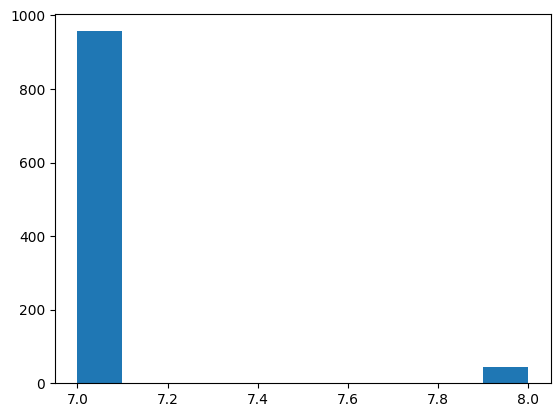

In [18]:
df = pd.read_csv("result0710.csv").iloc[:,1:]


ID = np.unique(df['filename'])




def count_id(df, key):
    lst = []
    ID = np.unique(df[key])
    for i in range(len(ID)):

        a = len(df[df[key] == ID[i]])
        lst.append(a)
    return np.array(lst)
id_count_str= count_id(df, 'filename')

plt.hist(count_id(df, 'filename'))

- title
- 이름
- 이름 데이터
- 진단명
- 진단명 데이터
- 처방전
- 처방전 데이터

In [43]:
len(j)

1006

In [95]:
ID_7 , ID_8= ID[id_count_str == 7] , ID[id_count_str == 8]
j = np.arange(1,len(ID_7),7)

lst = []
for i in range(len(j)):
    a = df[df['filename'] == ID_7[i]]['confidence'].values
    lst.append(a)

In [163]:
import numpy as np
import pandas as pd
from scipy import stats

# ── 입력 데이터 ──────────────────────────────
arr = np.array(lst)          # (n_runs, n_metrics) 형태로 변환
title = ['main', '이름', '이름 데이터',
         '진단명', '진단명 데이터',
         '처방전', '처방전 데이터']

# ── 요약 통계 ────────────────────────────────
n         = arr.shape[0]                   # 반복 횟수
mean_pred = arr.mean(axis=0)               # 평균
sem       = arr.std(axis=0, ddof=1) / np.sqrt(n)  # 표준오차
t_crit    = stats.t.ppf(0.975, df=n-1)     # 양쪽 95 % CI에 해당하는 t 값
half_w    = t_crit * sem                   # 신뢰구간 반폭

ci_lower  = mean_pred - half_w
ci_upper  = mean_pred + half_w

# ── 결과 표 ─────────────────────────────────
df = pd.DataFrame({
    'title'          : title,
    '평균 confidence': mean_pred.round(4),
    'CI 95% 낮음'    : ci_lower.round(4),
    'CI 95% 높음'    : ci_upper.round(4)
})
df.loc[]


,title,평균 confidence,CI 95% 낮음,CI 95% 높음
0,main,0.8200,0.8200,0.8200
1,이름,1.0000,1.0000,1.0000
2,이름 데이터,0.8867,0.8575,0.9159
3,진단명,0.9915,0.9909,0.9921
4,진단명 데이터,0.8561,0.8289,0.8833
5,처방전,1.0000,1.0000,1.0000
6,처방전 데이터,0.6534,0.6156,0.6913


In [74]:
mean_pred= np.array(lst).mean(axis=0).round(4)
title = ['main', '이름', '이름 데이터' , '진단명' , '진단명 데이터','처방전' , '처방전 데이터']
a = {'title':title, '평균 confidence' : mean_pred}
pd.DataFrame(a)

,title,평균 confidence
0,main,0.8200
1,이름,1.0000
2,이름 데이터,0.8867
3,진단명,0.9915
4,진단명 데이터,0.8561
5,처방전,1.0000
6,처방전 데이터,0.6534


In [154]:
ID_7_name_pred = np.array([df[df['filename'] == ID_7[i]]['text'].values[2] for i in range(len(ID_7))])
ID_7_jin_pred = np.array([df[df['filename'] == ID_7[i]]['text'].values[4] for i in range(len(ID_7))])
ID_7_che_pred = np.array([df[df['filename'] == ID_7[i]]['text'].values[6] for i in range(len(ID_7))])


ID_8_name_pred = np.array([df[df['filename'] == ID_8[i]]['text'].values[2] for i in range(len(ID_8))])
ID_8_jin_pred = np.array([df[df['filename'] == ID_8[i]]['text'].values[4] for i in range(len(ID_8))])
ID_8_che_pred = np.array([df[df['filename'] == ID_8[i]]['text'].values[6] for i in range(len(ID_8))])

In [100]:
import re
# 번호 추출 → 정수형 배열
ids8 = np.array([int(re.search(r'_(\d+)\.jpg$', p).group(1)) for p in ID_8])
ids7 = np.array([int(re.search(r'_(\d+)\.jpg$', p).group(1)) for p in ID_7])

ID_7_real_y = y.iloc[ids7-1,:]
ID_8_real_y = y.loc[~y.index.isin(ids7), :]

[104 135 160 220 245 258 279  29  31 330 332 342 350 364 366 377 399 428
 442 483 491  52 566 626 630 653 658 671 677 698 712 740 744 752  79 791
 807  82 833 959 964 971 996]


In [138]:
print(sum(ID_7_name_pred == ID_7_real_y['이름'].values) / len(ID_7_name_pred ) )
print(sum(ID_7_jin_pred == ID_7_real_y['진단명'].values) / len(ID_7_name_pred ) )
print(sum(ID_7_che_pred == ID_7_real_y['처방전'].values) / len(ID_7_name_pred ) )

0.6875653082549634
0.45245559038662486
0.2884012539184953


In [129]:
y1 = ID_7_name_pred 
y2= ID_7_real_y['이름'].values



lev.distance(y1[1], y2[1]) 

0

In [158]:
import numpy as np
from scipy import stats

# ────────────────────────────────────────────────
# 정확도 + 95 % 신뢰구간
#   pred  : 예측 배열(시퀀스)
#   true  : 실제 배열(시퀀스)
#   alpha : 1-신뢰수준 (0.05 → 95 %)
#   method: 'wilson' | 'normal' | 'clopper'
# 반환값  : (정확도, CI 하한, CI 상한)
# ────────────────────────────────────────────────
def accuracy_ci(pred, true, alpha=0.05, method="wilson"):
    pred, true = np.asarray(pred), np.asarray(true)
    if pred.shape[0] != true.shape[0]:
        raise ValueError("pred와 true 길이가 다릅니다.")

    n  = pred.size
    k  = int((pred == true).sum())   # 맞춘 개수
    p  = k / n                       # 정확도
    z  = stats.norm.ppf(1 - alpha/2) # 양측 z값 (≈1.96)

    if method == "normal":           # 정규 근사
        se  = np.sqrt(p * (1 - p) / n)
        low = max(0.0, p - z * se)
        high= min(1.0, p + z * se)

    elif method == "wilson":         # Wilson score
        denom = 1 + z**2 / n
        centre= (p + z**2/(2*n)) / denom
        half  = z * np.sqrt((p*(1 - p) + z**2/(4*n)) / n) / denom
        low, high = centre - half, centre + half

    elif method == "clopper":        # exact (beta)
        low  = stats.beta.ppf(alpha/2, k, n - k + 1) if k > 0 else 0.0
        high = stats.beta.ppf(1 - alpha/2, k + 1, n - k) if k < n else 1.0

    else:
        raise ValueError("method는 'normal', 'wilson', 'clopper' 중 하나여야 합니다.")

    return p, low, high


name_acc, name_low, name_high = accuracy_ci(
    ID_7_name_pred,
    ID_7_real_y['이름'].values,method="normal")

jin_acc,  jin_low,  jin_high  = accuracy_ci(
    ID_7_jin_pred,
    ID_7_real_y['진단명'].values,method="normal")

che_acc,  che_low,  che_high  = accuracy_ci(
    ID_7_che_pred,
    ID_7_real_y['처방전'].values,method="normal")

print(f"이름  정확도: {name_acc:.3f}  (95% CI {name_low:.3f}–{name_high:.3f})")
print(f"진단명 정확도: {jin_acc :.3f}  (95% CI {jin_low :.3f}–{jin_high :.3f})")
print(f"처방전 정확도: {che_acc :.3f}  (95% CI {che_low :.3f}–{che_high :.3f})")


이름  정확도: 0.688  (95% CI 0.658–0.717)
진단명 정확도: 0.452  (95% CI 0.421–0.484)
처방전 정확도: 0.288  (95% CI 0.260–0.317)


In [151]:
# 설치: pip install python-Levenshtein
import Levenshtein as lev

def lev_similarity(a: str, b: str) -> float:
    dist = lev.ratio(a, b)          # 편집 거리
    #max_len = max(len(a), len(b))
    return dist#1 - dist / max_len          # 0~1 사이로 정규화





def lev_mean(y,y2):
    return np.mean([lev_similarity(y1[i], y2[i]) for i in range(len(y1))])


In [147]:
# ── 설치가 안 되어 있으면 먼저 ───────────
# pip install python-Levenshtein

import numpy as np
import Levenshtein as lev    # lev.ratio() → 0~1 유사도 반환

# 1) 두 문자열 간 유사도
def lev_similarity(a: str, b: str) -> float:
    return lev.ratio(a, b)   # 바로 반환하면 OK

# 2) 예측 리스트 vs 정답 리스트 평균 유사도
def lev_mean(pred_list, true_list) -> float:
    if len(pred_list) != len(true_list):
        raise ValueError("pred_list와 true_list 길이가 다릅니다.")
    sims = [lev_similarity(str(p), str(t))
            for p, t in zip(pred_list, true_list)]
    return float(np.mean(sims))

# ── 사용 예시 ───────────────────────────
name_score = lev_mean(ID_7_name_pred,
                      ID_7_real_y['이름'].values)

jin_score  = lev_mean(ID_7_jin_pred,
                      ID_7_real_y['진단명'].values)

che_score  = lev_mean(ID_7_che_pred,
                      ID_7_real_y['처방전'].values)

print("이름  유사도 :", name_score)
print("진단명 유사도 :", jin_score)
print("처방전 유사도:", che_score)


이름  유사도 : 0.8921978404737024
진단명 유사도 : 0.9567246821596419
처방전 유사도: 0.9257559989037512


In [153]:
import numpy as np
import Levenshtein as lev        # pip install python-Levenshtein

# ── 1. 두 문자열 유사도(0~1) ───────────────────────────
def lev_similarity(a: str, b: str) -> float:
    return lev.ratio(str(a), str(b))     # 정규화 레벤슈타인 유사도

# ── 2. 실제값 길이를 기준으로 평균 유사도 계산 ────────
def lev_mean_from_true(pred_list, true_list) -> float:
    m = len(true_list)                   # 실제값 길이 기준
    sims = []
    for i in range(m):
        if i < len(pred_list):           # 예측이 있으면 비교
            sims.append(lev_similarity(pred_list[i], true_list[i]))
        else:                            # 예측이 없으면 유사도 0
            sims.append(0.0)
    return float(np.mean(sims))

# ── 사용 예 ────────────────────────────────────────────
name_score = lev_mean_from_true(ID_7_name_pred,
                                ID_7_real_y['이름'].values)

jin_score  = lev_mean_from_true(ID_7_jin_pred,
                                ID_7_real_y['진단명'].values)

che_score  = lev_mean_from_true(ID_7_che_pred,
                                ID_7_real_y['처방전'].values)

print("이름  평균 유사도:", name_score)
print("진단명 평균 유사도:", jin_score)
print("처방전 평균 유사도:", che_score)


이름  평균 유사도: 0.8921978404737024
진단명 평균 유사도: 0.9567246821596419
처방전 평균 유사도: 0.9257559989037512


In [156]:
from scipy.stats import t
import numpy as np

# ─────────────────────────────────────────────────────────────
# 1. 점 추정값(평균) · 95 % 신뢰구간 계산
#    - 입력: 1차원 배열 또는 리스트(scores)
#    - 반환: (mean, ci_low, ci_high)
# ─────────────────────────────────────────────────────────────
def mean_ci(scores, alpha: float = 0.05):
    scores = np.asarray(scores, dtype=float)
    n      = len(scores)
    m      = scores.mean()
    se     = scores.std(ddof=1) / np.sqrt(n)   # 표준오차
    tcrit  = t.ppf(1 - alpha/2, df=n-1)        # t_(n-1, 0.975)
    half_w = tcrit * se                        # 반폭
    return m, m - half_w, m + half_w

# ─────────────────────────────────────────────────────────────
# 2. 실제값 기준 평균 유사도 + 95 % CI 한 번에
# ─────────────────────────────────────────────────────────────
def similarity_with_ci(pred_list, true_list, **sim_kws):
    # 샘플별 유사도 벡터 만들기
    m = len(true_list)
    sims = [lev_similarity(pred_list[i], true_list[i], **sim_kws)
            if i < len(pred_list) else 0.0
            for i in range(m)]
    return mean_ci(sims)       # (mean, lower, upper) 튜플

print("처방전 평균 유사도:", che_score)
def similarity_with_ci(pred_list, true_list, **sim_kws):
    # 샘플별 유사도 벡터 만들기
    m = len(true_list)
    sims = [lev_similarity(pred_list[i], true_list[i], **sim_kws)
            if i < len(pred_list) else 0.0
            for i in range(m)]
    return mean_ci(sims)   

name_mean, name_low, name_high = similarity_with_ci(
    ID_7_name_pred, ID_7_real_y['이름'].values)

jin_mean,  jin_low,  jin_high  = similarity_with_ci(
    ID_7_jin_pred,  ID_7_real_y['진단명'].values)

che_mean,  che_low,  che_high  = similarity_with_ci(
    ID_7_che_pred,  ID_7_real_y['처방전'].values)

print(f"이름  : 평균 {name_mean:.3f}  (95% CI {name_low:.3f}–{name_high:.3f})")
print(f"진단명: 평균 {jin_mean :.3f}  (95% CI {jin_low :.3f}–{jin_high :.3f})")
print(f"처방전: 평균 {che_mean :.3f}  (95% CI {che_low :.3f}–{che_high :.3f})")


처방전 평균 유사도: 0.9257559989037512
이름  : 평균 0.892  (95% CI 0.881–0.903)
진단명: 평균 0.957  (95% CI 0.953–0.960)
처방전: 평균 0.926  (95% CI 0.922–0.930)
